In [9]:
## PATH settings
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))
sys.path.append(project_root)
COMMON_PATH = os.path.join(project_root, 'common')

## Bespoke class imports
from common.database.adatabase import ADatabase
from common.extractor.alpaca_extractor import AlpacaExtractor
from common.processor.processor import Processor as p
from common.processor.utils import Utils
from financial_common.indicator.indicator import Indicator
from financial_common.risk.benchmark import Benchmark
from financial_common.portfolio_management.kpi import KPI
from financial_common.metric.metric import Metric
from financial_common.portfolio_management.portfolio_selection import PortfolioSelection
from financial_common.risk.risk_type import RiskType
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [14]:
ticker = "SBEV.WS"
alp = AlpacaExtractor()

In [10]:
end = Utils.last_weekday(alp.clock())
start = end - timedelta(days=5)

In [16]:
trades = alp.trades(ticker,start,end)
quotes = alp.quotes(ticker,start,end)

In [28]:
analysis = quotes.merge(trades,on="t",how="outer",indicator=True).sort_values("t").ffill()[["t","ap","as","bp","bs","p","s"]].dropna()

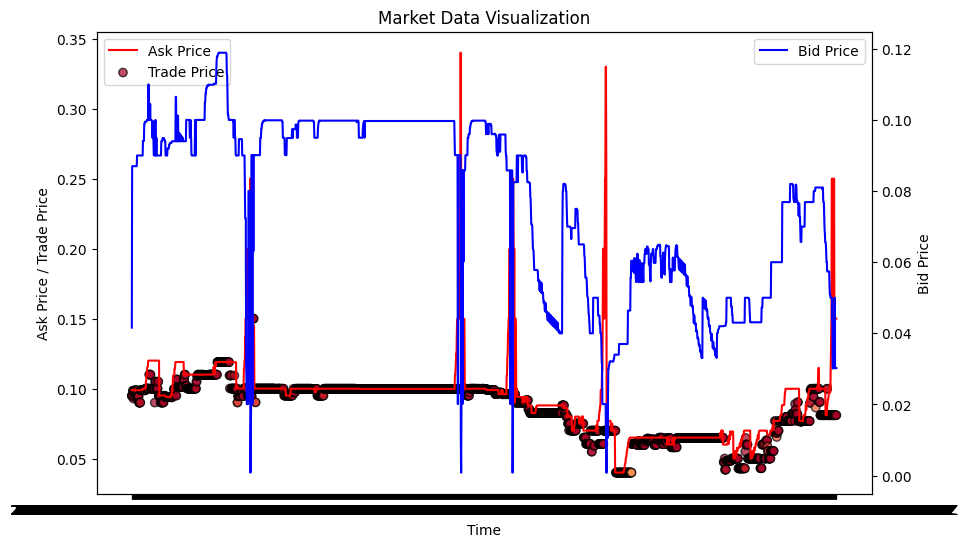

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax1 = plt.subplots(figsize=(10, 6))

# Secondary axis for bid price (bp)
ax2 = ax1.twinx()

# Line plots for ap and bp
ax1.plot(analysis["t"], analysis["ap"], label="Ask Price", color="red")
ax2.plot(analysis["t"], analysis["bp"], label="Bid Price", color="blue")

# Normalize `s` for colormap scaling
norm = mcolors.Normalize(vmin=analysis["s"].min(), vmax=analysis["s"].max())
colors = plt.cm.RdYlGn(norm(analysis["s"]))  # RdYlGn colormap

# Scatter plot for p with color mapped from s
sc = ax1.scatter(analysis["t"], analysis["p"], color=colors, alpha=0.7, label="Trade Price", edgecolors="black")

# Labels and legend
ax1.set_xlabel("Time")
ax1.set_ylabel("Ask Price / Trade Price")
ax2.set_ylabel("Bid Price")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Market Data Visualization")
plt.show()